# LAB Processing graphs with NetworkX

## The lab was fulfilled by Kozhevnyk Ivan (group K12) Liashko A.V.

### Task <b>114</b>
<br>
build graph with <b>15</b> nodes, <b>24</b> edges, <b>3</b> connected components

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

### 1 Graph construction

In [86]:
g = nx.Graph()
g.add_nodes_from(range(1, 16))
edges = [(1, 2), (1, 3), (2, 3), (1, 4), (2, 4), (1, 5), (2, 5), 
         (1, 6), (2, 6), (1, 7), (2, 7), (1, 8), (2, 8), 
         (1, 9), (2, 9), (1, 10), (2, 10), (3, 4), (4, 5), (5, 6),
         (11, 12), (11, 13), (12, 13), (14, 15)
         ]
g.add_edges_from(edges)


The number of nodes:

In [87]:
g.number_of_nodes()

15

The number of edges:

In [88]:
g.number_of_edges()

24

The number of connected components:

In [89]:
nx.number_connected_components(g)

3

Graph in a text file.

In [90]:
nx.write_adjlist(g, 'laba_work5.txt')

### 2 Graph loading and visualization

In [91]:
g = nx.read_adjlist('laba_work5.txt', nodetype=int)

In [92]:
g.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

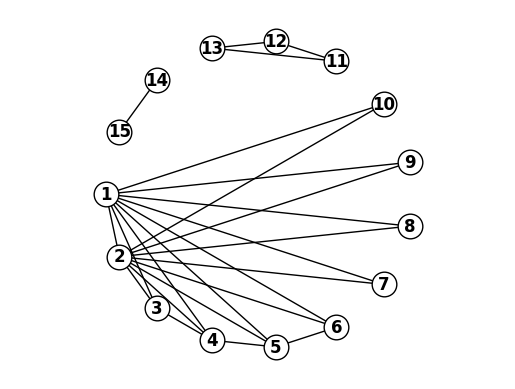

In [93]:
configurations = {'with_labels':True, 'font_weight': 'bold', 'font_color': 'black', 'node_size':315,
                  'node_color': 'white', 'edgecolors': 'black'}
plt.gca().set_aspect('equal', adjustable='datalim')
nx.draw_shell(g,**configurations)
plt.savefig('task2.jpg') 
plt.show()

### 3 Nodes positioning

In [94]:
pos = { 1: [1, 0],
        2: [4, 0],
        3: [2.5, 0.5],
        4: [2.5, 1],
        5: [2.5, 1.5],
        6: [2.5, 2],
        7: [2.5, -0.5],
        8: [2.5, -1],
        9: [2.5, -1.5],
        10: [2.5, -2],
        11: [5.5, 0],
        12: [7, 2],
        13: [8.5, 0],
        14: [10, 1],
        15: [14, 4]}

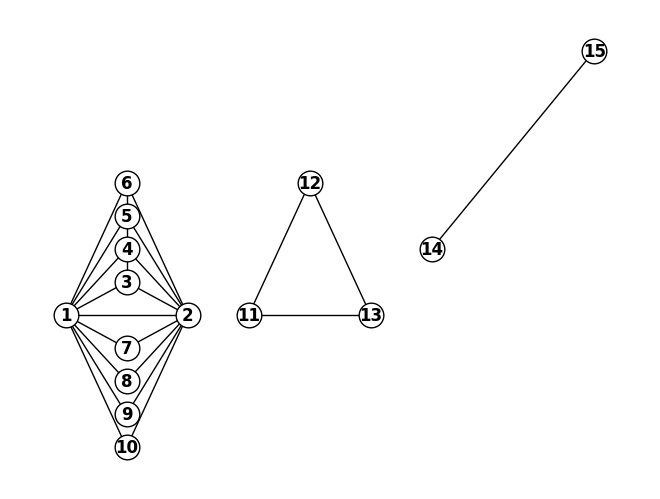

In [95]:
nx.draw(g, pos=pos, **configurations)
plt.savefig('task3.jpg')
plt.show()

### 4 Connected components

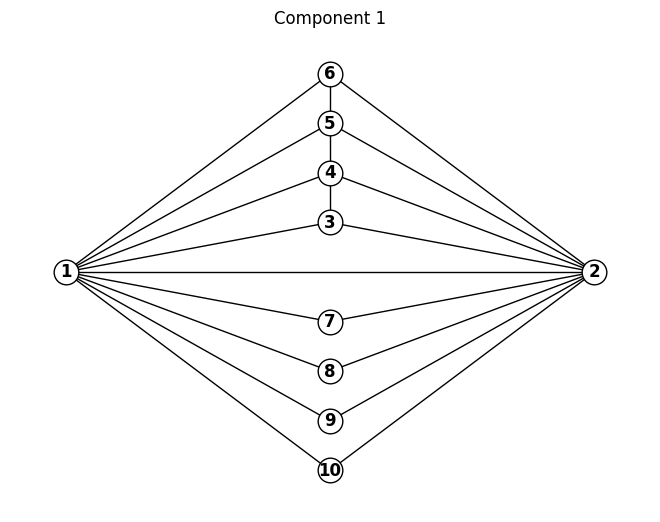

Component 1:
Number of vertices: 10
Number of edges: 20
Degrees of vertices: {1: 9, 2: 9, 3: 3, 4: 4, 5: 4, 6: 3, 7: 2, 8: 2, 9: 2, 10: 2}
Eccentricities of vertices: {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2}
Radius: 1
Diameter: 2


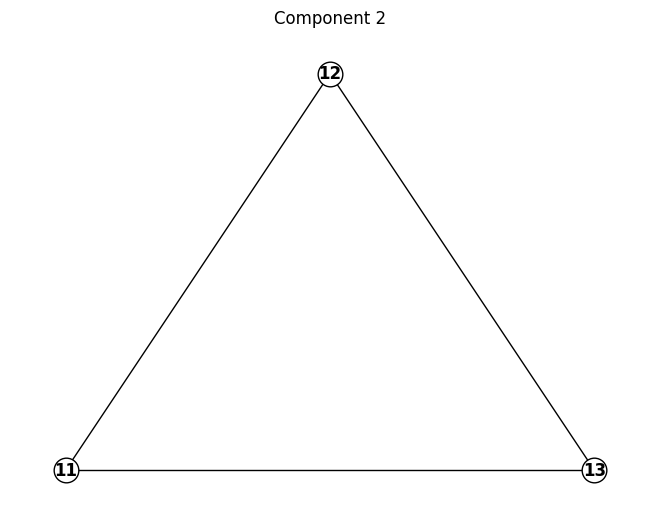

Component 2:
Number of vertices: 3
Number of edges: 3
Degrees of vertices: {11: 2, 12: 2, 13: 2}
Eccentricities of vertices: {11: 1, 12: 1, 13: 1}
Radius: 1
Diameter: 1


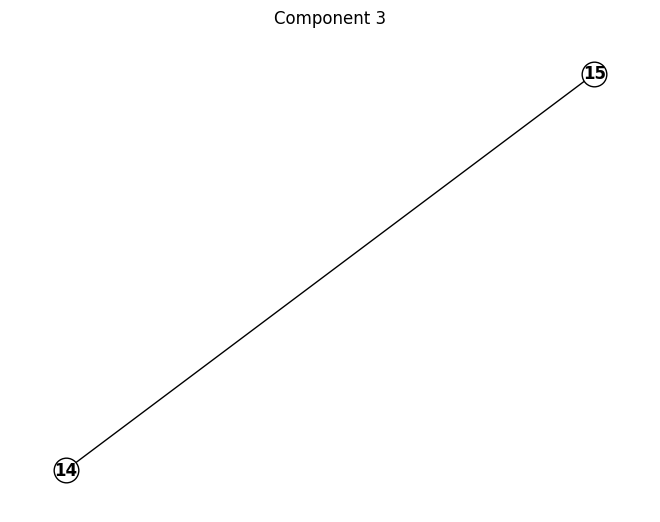

Component 3:
Number of vertices: 2
Number of edges: 1
Degrees of vertices: {14: 1, 15: 1}
Eccentricities of vertices: {14: 1, 15: 1}
Radius: 1
Diameter: 1


In [96]:
for i, component in enumerate(nx.connected_components(g), 1):
    subgraph = g.subgraph(component)
    
    plt.figure()
    nx.draw(subgraph, pos=pos, **configurations)
    plt.title(f"Component {i}")
    plt.show()
    
    num_vertices = len(subgraph.nodes)
    num_edges = len(subgraph.edges)
    print(f"Component {i}:")
    print(f"Number of vertices: {num_vertices}")
    print(f"Number of edges: {num_edges}")
    
    degrees = dict(subgraph.degree())
    print("Degrees of vertices:", degrees)
    
    eccentricities = nx.eccentricity(subgraph)
    print("Eccentricities of vertices:", eccentricities)
    
    radius = nx.radius(subgraph)
    diameter = nx.diameter(subgraph)
    print(f"Radius: {radius}")
    print(f"Diameter: {diameter}")
    
   

### 5 Diameters of nontrivial connected components

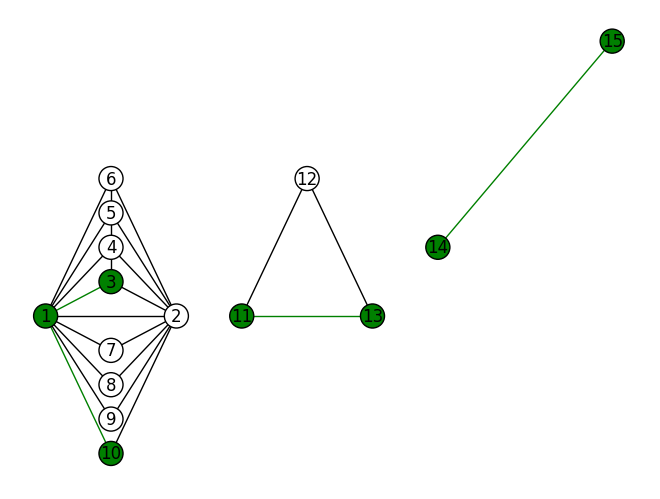

In [97]:
components = [g.subgraph(c) for c in nx.connected_components(g)]

for comp in components:
    if len(comp) > 1:
        diameter = max(nx.shortest_path(comp, max(nx.eccentricity(comp))).values(), key=len)

        node_color = [('green' if node in diameter else 'white') for node in comp.nodes()]
        edge_color = [('green' if n0 in diameter and n1 in diameter else 'black') for n0, n1 in comp.edges()]

        nx.draw(comp, pos, edge_color=edge_color, node_color=node_color, with_labels=True, edgecolors='black')
    else:
        nx.draw(comp, pos, with_labels=True)

plt.show()


### 6 Depth spanning forest

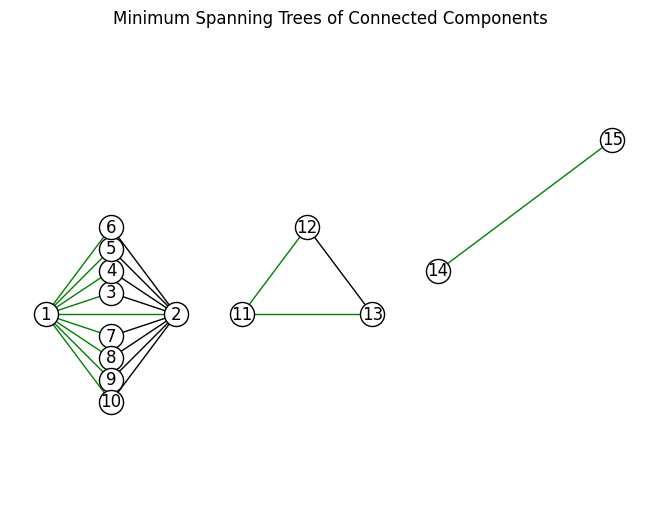

In [98]:
for i, component in enumerate(components):
    subgraph = g.subgraph(component)
    forest = nx.minimum_spanning_tree(subgraph)
    
    edge_colors = [edge_color[i % len(edge_color)] if e in forest.edges() else 'black' for e in subgraph.edges()]
    
    nx.draw(subgraph, pos=pos, edge_color=edge_colors, node_color='white', with_labels=True, edgecolors='black')

plt.gca().set_aspect('equal', adjustable='datalim')
plt.title('Minimum Spanning Trees of Connected Components')
plt.show()